In [20]:
import os
import sys
import numpy as np
import sklearn as skl
import time
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn.model_selection import train_test_split

sys.path.append("../../../")
import CalibratedTimeseriesModels

from CalibratedTimeseriesModels.utils import *
from CalibratedTimeseriesModels.models.gnn import *
from CalibratedTimeseriesModels.models.gmnn import *
from CalibratedTimeseriesModels.evaluators import ExplicitEvaluator

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# load data
X_orig = torch.load("../../../datasets/processed/openEI/X_openei_011_subset_multitask.pt")
Y_orig = torch.load("../../../datasets/processed/openEI/Y_openei_011_subset_multitask.pt")

past_dims = 24
fut_dims = 12

X = X_orig[0,:,:past_dims].unsqueeze(-1).float()
Y = Y_orig[0,:,:fut_dims].unsqueeze(-1).float()

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=1)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, train_size = 0.7/0.9,random_state=1)
X_batches, Y_batches = batch(X_train, Y_train, batch_size = 128)

### Diagonal Covariance Matrix

In [4]:
hidden_layers = [40, 40, 40]
model1 = GaussianNeuralNet(1, past_dims, hidden_layers, 1, fut_dims)

In [5]:
train(model1, X_batches, Y_batches, num_epochs=100)

epoch : 1, loss: 5.2400
epoch : 11, loss: -14.3354
epoch : 21, loss: -16.1649
epoch : 31, loss: -15.7504
epoch : 41, loss: -16.4568
epoch : 51, loss: -17.1297
epoch : 61, loss: -17.5152
epoch : 71, loss: -16.6138
epoch : 81, loss: -18.0027
epoch : 91, loss: -18.9859
Learning finished!


In [6]:
model1.eval()
dtest1 = model1(X_test)
mape(dtest1, Y_test)

(tensor(0.0376, grad_fn=<MeanBackward0>),
 tensor([0.0259, 0.0265, 0.0344, 0.0362, 0.0397, 0.0383, 0.0365, 0.0411, 0.0510,
         0.0407, 0.0394, 0.0412], grad_fn=<MeanBackward1>),
 tensor([0.0213, 0.0237, 0.0301, 0.0342, 0.0380, 0.0354, 0.0314, 0.0328, 0.0398,
         0.0376, 0.0372, 0.0387], grad_fn=<StdBackward1>))

In [7]:
wape(dtest1, Y_test)

(tensor(0.0549),
 tensor([0.0374, 0.0423, 0.0492, 0.0520, 0.0543, 0.0545, 0.0544, 0.0562, 0.0638,
         0.0588, 0.0639, 0.0722]),
 tensor([0.0155, 0.0172, 0.0235, 0.0276, 0.0313, 0.0287, 0.0243, 0.0261, 0.0326,
         0.0302, 0.0297, 0.0300]))

In [8]:
rmse(dtest1, Y_test)

(tensor(0.0515, grad_fn=<PowBackward0>),
 tensor([0.0015, 0.0015, 0.0024, 0.0026, 0.0028, 0.0026, 0.0023, 0.0030, 0.0044,
         0.0028, 0.0029, 0.0030], grad_fn=<MeanBackward1>),
 tensor([0.0025, 0.0035, 0.0054, 0.0075, 0.0079, 0.0055, 0.0050, 0.0049, 0.0061,
         0.0050, 0.0059, 0.0057], grad_fn=<StdBackward1>))

In [9]:
rwse(dtest1, Y_test)

(tensor(0.0746),
 tensor([0.0030, 0.0035, 0.0046, 0.0051, 0.0051, 0.0051, 0.0051, 0.0055, 0.0070,
         0.0059, 0.0074, 0.0095]),
 tensor([0.0033, 0.0040, 0.0060, 0.0079, 0.0081, 0.0060, 0.0053, 0.0052, 0.0065,
         0.0055, 0.0071, 0.0079]))

In [10]:
nll(dtest1, Y_test)

(tensor(-19.1911, grad_fn=<MeanBackward0>),
 tensor([-2.1273e+01, -2.2441e+01,  5.2422e+01, -1.9447e+01, -1.8502e+01,
         -2.3773e+01, -2.2153e+01, -1.8301e+01, -2.6557e+01, -2.5639e+01,
         -2.2495e+01, -1.7749e+00, -2.7964e+01, -1.4771e+01, -2.5234e+01,
         -1.6484e+01, -2.1290e+01, -1.2480e+01, -2.2411e+01, -2.5665e+01,
         -2.2158e+01, -2.1456e+01, -2.3200e+01, -2.5307e+01, -2.0229e+01,
         -1.3088e+01, -2.3769e+01, -1.7085e+01, -2.3167e+01, -2.5383e+01,
         -2.1657e+01, -2.4217e+01, -2.0959e+01, -1.4521e+01, -2.6780e+01,
         -1.9000e+01, -1.0279e+01,  1.3264e+01, -2.1332e+01, -2.0563e+01,
         -1.7505e+01, -2.2802e+01, -1.6971e+01, -1.7868e+01, -1.7688e+01,
         -2.0230e+01, -7.5972e+00, -1.1941e+01, -2.2426e+01, -2.6667e+01,
         -1.5450e+01, -1.7595e+01, -2.1339e+01, -1.9845e+01, -2.1539e+01,
         -2.6586e+01, -1.6463e+01, -2.0672e+01, -1.3816e+01, -2.2656e+01,
         -2.0294e+01, -2.5908e+01, -1.9310e+01, -2.1418e+01, -2.3602

### Full Covariance Matrix

In [11]:
hidden_layers = [40, 40, 40]
model2 = GaussianNeuralNet(1, past_dims, hidden_layers, 1, fut_dims, covariance_type='full')

In [12]:
train(model2, X_batches, Y_batches, num_epochs=100)

epoch : 1, loss: 9.9993
epoch : 11, loss: -5.6627
epoch : 21, loss: -9.0656
epoch : 31, loss: -9.9540
epoch : 41, loss: -14.4889
epoch : 51, loss: -12.6706
epoch : 61, loss: -15.5657
epoch : 71, loss: -6.5676
epoch : 81, loss: -9.1253
epoch : 91, loss: -4.2734
Learning finished!


In [13]:
model2.eval()
dtest2 = model2(X_test)
mape(dtest2, Y_test)

(tensor(0.2887, grad_fn=<MeanBackward0>),
 tensor([0.2996, 0.2868, 0.2855, 0.2874, 0.2872, 0.2840, 0.2836, 0.2782, 0.2820,
         0.2928, 0.3012, 0.2955], grad_fn=<MeanBackward1>),
 tensor([0.2188, 0.2134, 0.2131, 0.2186, 0.2161, 0.2089, 0.2060, 0.2112, 0.2161,
         0.2222, 0.2339, 0.2351], grad_fn=<StdBackward1>))

In [14]:
wape(dtest2, Y_test)

(tensor(0.5800),
 tensor([0.5320, 0.5696, 0.5967, 0.6088, 0.6231, 0.6316, 0.6155, 0.5953, 0.5737,
         0.5606, 0.5389, 0.5138]),
 tensor([0.1886, 0.1862, 0.1915, 0.1988, 0.2008, 0.1998, 0.1952, 0.1891, 0.1881,
         0.1903, 0.1982, 0.1967]))

In [15]:
rmse(dtest2, Y_test)

(tensor(0.4674, grad_fn=<PowBackward0>),
 tensor([0.2004, 0.2133, 0.2161, 0.2208, 0.2241, 0.2179, 0.2119, 0.2154, 0.2223,
         0.2356, 0.2335, 0.2100], grad_fn=<MeanBackward1>),
 tensor([0.3939, 0.4342, 0.4230, 0.4271, 0.4450, 0.4342, 0.4121, 0.4254, 0.4530,
         0.4681, 0.4538, 0.4045], grad_fn=<StdBackward1>))

In [16]:
nll(dtest2, Y_test)

(tensor(-7.7526, grad_fn=<MeanBackward0>),
 tensor([ -8.2341,  -8.0739, -10.0163,  -6.7900,  -2.9010,  -7.8229,  -8.0120,
          -3.5303,  -7.8568,  -9.8147,  -8.9481,  -9.8344, -10.9503,  -7.5388,
          -8.5375,  -5.6139, -10.0195,  -6.4870,  -5.7244,  -9.8506,  -8.7668,
          -7.4359,  -6.1931, -11.0410,  -9.1069,  -5.0062,  -9.8809,  -0.1180,
          -9.9442,  -6.2730,  -9.5726,  -7.8374,  -8.2556,  -6.2419, -10.4310,
          -7.9814,  -4.4693,  -7.5423,  -7.0759, -11.4019,  -8.5420,  -7.2299,
          -9.9963,  -9.1276,  -6.1359,  -8.0602,  -8.7664,  -2.8299,  -8.7149,
         -10.5859,  -1.7075,  -7.1310,  -5.9531,  -9.2931,  -9.9298, -10.5573,
           0.7779,  -5.2533,  -6.3865,  -8.7281,  -6.7365,  -9.5143,  -4.9518,
          -5.2404,  -8.5144,  -6.3117, -10.0311,  -9.5717,  -8.4477, -11.4754,
          -5.0106,  -8.7125,  -9.3171, -10.5870,  -8.7295,  -5.7833,  -5.4630,
         -11.0077,   0.5452, -11.9837,  -9.1147,  -6.0634,  -9.7631, -10.8052,
         

## Low Rank Covariance

In [17]:
hidden_layers = [40, 40, 40]
model3 = GaussianNeuralNet(1, past_dims, hidden_layers, 1, fut_dims, covariance_type='low-rank',rank=2)

In [18]:
train(model3, X_batches, Y_batches, num_epochs=100)

epoch : 1, loss: 4.4975
epoch : 11, loss: -16.2770
epoch : 21, loss: -19.3763
epoch : 31, loss: -20.3542
epoch : 41, loss: -19.2770
epoch : 51, loss: -20.8041
epoch : 61, loss: -22.3457
epoch : 71, loss: -22.4951
epoch : 81, loss: -23.3020
epoch : 91, loss: -22.9452
Learning finished!


In [19]:
model3.eval()
dtest3 = model3(X_test)
mape(dtest3, Y_test)

(tensor(0.0642, grad_fn=<MeanBackward0>),
 tensor([0.0460, 0.0623, 0.0666, 0.0743, 0.0669, 0.0583, 0.0523, 0.0549, 0.0649,
         0.0748, 0.0761, 0.0729], grad_fn=<MeanBackward1>),
 tensor([0.0399, 0.0533, 0.0595, 0.0665, 0.0600, 0.0531, 0.0477, 0.0515, 0.0643,
         0.0738, 0.0704, 0.0760], grad_fn=<StdBackward1>))

In [20]:
wape(dtest3, Y_test)

(tensor(0.1597),
 tensor([0.1038, 0.1421, 0.1538, 0.1741, 0.1658, 0.1555, 0.1478, 0.1502, 0.1773,
         0.1874, 0.1815, 0.1769]),
 tensor([0.0380, 0.0411, 0.0458, 0.0476, 0.0444, 0.0569, 0.0608, 0.0629, 0.0743,
         0.0788, 0.0764, 0.0910]))

In [21]:
rmse(dtest3, Y_test)

(tensor(0.1010, grad_fn=<PowBackward0>),
 tensor([0.0044, 0.0120, 0.0178, 0.0247, 0.0157, 0.0075, 0.0046, 0.0043, 0.0060,
         0.0086, 0.0087, 0.0081], grad_fn=<MeanBackward1>),
 tensor([0.0081, 0.0323, 0.0537, 0.0655, 0.0383, 0.0147, 0.0085, 0.0060, 0.0089,
         0.0135, 0.0126, 0.0143], grad_fn=<StdBackward1>))

In [22]:
rwse(dtest3, Y_test)

(tensor(0.2198),
 tensor([0.0189, 0.0444, 0.0568, 0.0791, 0.0617, 0.0400, 0.0326, 0.0341, 0.0502,
         0.0581, 0.0547, 0.0490]),
 tensor([0.0146, 0.0567, 0.0877, 0.1148, 0.0752, 0.0271, 0.0136, 0.0134, 0.0235,
         0.0292, 0.0284, 0.0302]))

In [23]:
nll(dtest3, Y_test)

(tensor(-24.1835, grad_fn=<MeanBackward0>),
 tensor([-19.1001, -24.5772,  -9.6855, -20.7407, -22.6189, -30.6581, -26.0116,
         -21.0209, -27.2163, -30.2481, -31.6475, -25.2325, -30.3567, -21.3885,
         -25.3637, -26.3855, -29.7524, -20.7489, -23.7378, -28.4841, -28.5103,
         -24.4268, -27.8216, -25.7840, -27.0855, -22.5970, -29.5260, -18.4078,
         -29.4161, -30.4950, -23.8895, -26.2639, -20.7063, -24.9693, -28.5801,
         -28.7741, -17.1305, -24.1729, -26.1214, -28.8391,  -2.2912, -26.8084,
         -29.4781, -23.2328, -22.4502, -27.0472, -23.1456, -16.4091, -25.5446,
         -30.6269, -20.8215, -23.6746, -23.9949, -25.0175, -31.2399, -31.1027,
         -19.1748, -25.1313, -26.0128, -29.8003, -25.4311, -31.4029, -20.9376,
         -27.7629, -30.2632, -24.9045, -28.5430,  10.9421, -27.8374, -29.5398,
         -21.9386, -18.7812, -27.9711, -25.8215, -21.7292, -21.5877, -25.1873,
         -29.7758,  69.4523, -27.5096, -26.7371, -27.6833, -32.3952, -27.5679,
        

## Single Gaussian sample comparisons

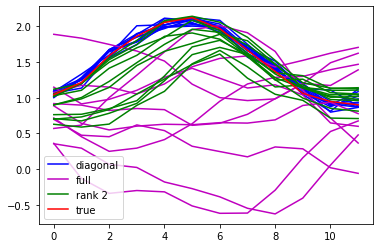

In [47]:
samples1 = dtest1.sample((10,))
samples2 = dtest2.sample((10,))
samples3 = dtest3.sample((10,))

i=0
a1 = plt.plot(range(fut_dims), samples1[:,i,:].T,'b',label='diagonal')
a2 = plt.plot(range(fut_dims), samples2[:,i,:].T,'m',label='full')
a3 = plt.plot(range(fut_dims), samples3[:,i,:].T,'g',label='rank 2')
a4 = plt.plot(range(fut_dims), Y_test[i,:,0], 'r', label = 'true')
plt.legend(handles =[a1[0],a2[0],a3[0],a4[0]])
plt.show()

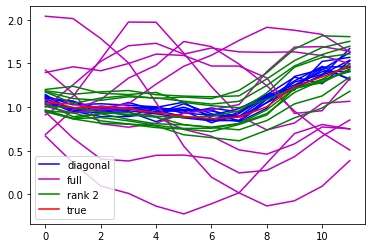

In [46]:
i=100
a1 = plt.plot(range(fut_dims), samples1[:,i,:].T,'b',label='diagonal')
a2 = plt.plot(range(fut_dims), samples2[:,i,:].T,'m',label='full')
a3 = plt.plot(range(fut_dims), samples3[:,i,:].T,'g',label='rank 2')
a4 = plt.plot(range(fut_dims), Y_test[i,:,0], 'r', label = 'true')
plt.legend(handles =[a1[0],a2[0],a3[0],a4[0]])
plt.show()

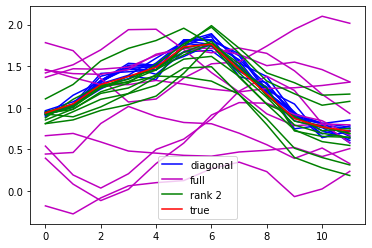

In [48]:
i=200
a1 = plt.plot(range(fut_dims), samples1[:,i,:].T,'b',label='diagonal')
a2 = plt.plot(range(fut_dims), samples2[:,i,:].T,'m',label='full')
a3 = plt.plot(range(fut_dims), samples3[:,i,:].T,'g',label='rank 2')
a4 = plt.plot(range(fut_dims), Y_test[i,:,0], 'r', label = 'true')
plt.legend(handles =[a1[0],a2[0],a3[0],a4[0]])
plt.show()

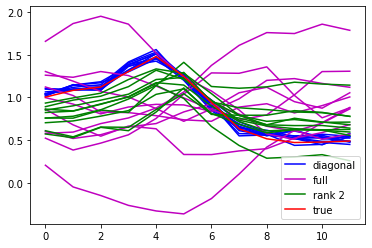

In [49]:
i=300
a1 = plt.plot(range(fut_dims), samples1[:,i,:].T,'b',label='diagonal')
a2 = plt.plot(range(fut_dims), samples2[:,i,:].T,'m',label='full')
a3 = plt.plot(range(fut_dims), samples3[:,i,:].T,'g',label='rank 2')
a4 = plt.plot(range(fut_dims), Y_test[i,:,0], 'r', label = 'true')
plt.legend(handles =[a1[0],a2[0],a3[0],a4[0]])
plt.show()

### Isotropic Mixture Model

In [8]:
hidden_layers = [40, 40, 40]
model4 = GaussianMixtureNeuralNet(1, past_dims, hidden_layers, 1, fut_dims, n_components=2)

In [9]:
train(model4, X_batches, Y_batches, num_epochs=100)

epoch : 1, loss: 4.2734
epoch : 11, loss: -13.2309
epoch : 21, loss: -15.2276
epoch : 31, loss: -18.0104
epoch : 41, loss: -18.5852
epoch : 51, loss: -17.4930
epoch : 61, loss: -18.7187
epoch : 71, loss: -18.6310
epoch : 81, loss: -20.1158
epoch : 91, loss: -19.9852
Learning finished!


In [10]:
model4.eval()
dtest4 = model4(X_test)
mape(dtest4, Y_test)

(tensor(0.0496, grad_fn=<MeanBackward0>),
 tensor([0.0375, 0.0390, 0.0463, 0.0622, 0.0481, 0.0482, 0.0493, 0.0596, 0.0497,
         0.0459, 0.0541, 0.0552], grad_fn=<MeanBackward1>),
 tensor([0.0263, 0.0339, 0.0404, 0.0527, 0.0413, 0.0370, 0.0387, 0.0454, 0.0415,
         0.0397, 0.0472, 0.0439], grad_fn=<StdBackward1>))

In [11]:
wape(dtest4, Y_test)

(tensor(0.0770),
 tensor([0.0585, 0.0674, 0.0775, 0.0934, 0.0866, 0.0809, 0.0792, 0.0850, 0.0699,
         0.0678, 0.0765, 0.0816]),
 tensor([0.0178, 0.0230, 0.0280, 0.0385, 0.0303, 0.0252, 0.0267, 0.0326, 0.0323,
         0.0320, 0.0383, 0.0340]))

In [12]:
rmse(dtest4, Y_test)

(tensor(0.0673, grad_fn=<PowBackward0>),
 tensor([0.0025, 0.0027, 0.0033, 0.0052, 0.0039, 0.0052, 0.0051, 0.0065, 0.0046,
         0.0039, 0.0054, 0.0059], grad_fn=<MeanBackward1>),
 tensor([0.0043, 0.0055, 0.0061, 0.0086, 0.0079, 0.0097, 0.0092, 0.0101, 0.0077,
         0.0072, 0.0097, 0.0098], grad_fn=<StdBackward1>))

In [13]:
rwse(dtest4, Y_test)

(tensor(0.1021),
 tensor([0.0061, 0.0080, 0.0101, 0.0141, 0.0120, 0.0115, 0.0108, 0.0122, 0.0088,
         0.0083, 0.0106, 0.0126]),
 tensor([0.0054, 0.0070, 0.0080, 0.0103, 0.0093, 0.0110, 0.0100, 0.0106, 0.0082,
         0.0079, 0.0108, 0.0117]))

In [14]:
nll(dtest4, Y_test)

(tensor(-17.2960, grad_fn=<MeanBackward0>),
 tensor([-13.5463, -25.8867,  54.0661, -25.4811,  -1.6621, -16.5063, -15.8013,
         -16.0059, -24.7668, -25.9512, -18.0663, -12.5611, -22.3229, -13.3710,
         -24.2747, -17.5147, -20.0475, -14.7745, -17.7259, -19.0333, -20.8372,
         -24.7121, -14.1536, -19.9690,   2.0030, -14.9526, -29.6076, -13.4214,
         -26.4702, -23.2451, -18.7645, -17.4244, -14.3689, -13.2363, -22.2806,
         -17.6424, -14.4705,   7.5812, -15.4183, -23.4594,  -8.8779, -20.6888,
         -19.8456, -13.2796, -16.1501, -23.2722, -13.7423, -10.9981, -15.4614,
         -25.1630, -18.3771, -14.8476, -20.9042, -13.2189, -23.9298, -26.3863,
         -10.4192, -17.7479, -17.7397, -11.8869, -15.5044, -20.0628,  -8.5750,
         -19.4049, -24.9217, -18.4111, -13.2928, -11.9801, -15.6964, -15.8845,
         -15.2201, -20.2448, -28.3078, -19.0722, -16.3380, -18.8908, -15.1419,
         -16.9750,  -6.6678, -19.6176, -15.9590, -13.2015, -28.9175, -26.8159,
        

### Full Mixture Model

In [8]:
hidden_layers = [40, 40, 40]
model5 = GaussianMixtureNeuralNet(1, past_dims, hidden_layers, 1, fut_dims, n_components=2)

In [9]:
train(model5, X_batches, Y_batches, num_epochs=100)

epoch : 1, loss: 4.2734
epoch : 11, loss: -13.2309
epoch : 21, loss: -15.2276
epoch : 31, loss: -18.0104
epoch : 41, loss: -18.5852
epoch : 51, loss: -17.4930
epoch : 61, loss: -18.7187
epoch : 71, loss: -18.6310
epoch : 81, loss: -20.1158
epoch : 91, loss: -19.9852
Learning finished!


In [10]:
model5.eval()
dtest5 = model4(X_test)
mape(dtest5, Y_test)

(tensor(0.0496, grad_fn=<MeanBackward0>),
 tensor([0.0375, 0.0390, 0.0463, 0.0622, 0.0481, 0.0482, 0.0493, 0.0596, 0.0497,
         0.0459, 0.0541, 0.0552], grad_fn=<MeanBackward1>),
 tensor([0.0263, 0.0339, 0.0404, 0.0527, 0.0413, 0.0370, 0.0387, 0.0454, 0.0415,
         0.0397, 0.0472, 0.0439], grad_fn=<StdBackward1>))

In [11]:
wape(dtest5, Y_test)

(tensor(0.0770),
 tensor([0.0585, 0.0674, 0.0775, 0.0934, 0.0866, 0.0809, 0.0792, 0.0850, 0.0699,
         0.0678, 0.0765, 0.0816]),
 tensor([0.0178, 0.0230, 0.0280, 0.0385, 0.0303, 0.0252, 0.0267, 0.0326, 0.0323,
         0.0320, 0.0383, 0.0340]))

In [12]:
rmse(dtest5, Y_test)

(tensor(0.0673, grad_fn=<PowBackward0>),
 tensor([0.0025, 0.0027, 0.0033, 0.0052, 0.0039, 0.0052, 0.0051, 0.0065, 0.0046,
         0.0039, 0.0054, 0.0059], grad_fn=<MeanBackward1>),
 tensor([0.0043, 0.0055, 0.0061, 0.0086, 0.0079, 0.0097, 0.0092, 0.0101, 0.0077,
         0.0072, 0.0097, 0.0098], grad_fn=<StdBackward1>))

In [13]:
rwse(dtest5, Y_test)

(tensor(0.1021),
 tensor([0.0061, 0.0080, 0.0101, 0.0141, 0.0120, 0.0115, 0.0108, 0.0122, 0.0088,
         0.0083, 0.0106, 0.0126]),
 tensor([0.0054, 0.0070, 0.0080, 0.0103, 0.0093, 0.0110, 0.0100, 0.0106, 0.0082,
         0.0079, 0.0108, 0.0117]))

In [14]:
nll(dtest5, Y_test)

(tensor(-17.2960, grad_fn=<MeanBackward0>),
 tensor([-13.5463, -25.8867,  54.0661, -25.4811,  -1.6621, -16.5063, -15.8013,
         -16.0059, -24.7668, -25.9512, -18.0663, -12.5611, -22.3229, -13.3710,
         -24.2747, -17.5147, -20.0475, -14.7745, -17.7259, -19.0333, -20.8372,
         -24.7121, -14.1536, -19.9690,   2.0030, -14.9526, -29.6076, -13.4214,
         -26.4702, -23.2451, -18.7645, -17.4244, -14.3689, -13.2363, -22.2806,
         -17.6424, -14.4705,   7.5812, -15.4183, -23.4594,  -8.8779, -20.6888,
         -19.8456, -13.2796, -16.1501, -23.2722, -13.7423, -10.9981, -15.4614,
         -25.1630, -18.3771, -14.8476, -20.9042, -13.2189, -23.9298, -26.3863,
         -10.4192, -17.7479, -17.7397, -11.8869, -15.5044, -20.0628,  -8.5750,
         -19.4049, -24.9217, -18.4111, -13.2928, -11.9801, -15.6964, -15.8845,
         -15.2201, -20.2448, -28.3078, -19.0722, -16.3380, -18.8908, -15.1419,
         -16.9750,  -6.6678, -19.6176, -15.9590, -13.2015, -28.9175, -26.8159,
        

### Low Rank Mixture Model

In [21]:
hidden_layers = [40, 40, 40]
model6 = GaussianMixtureNeuralNet(1, past_dims, hidden_layers, 1, fut_dims, n_components=2, covariance_type='low-rank',rank=2)

In [22]:
train(model6, X_batches, Y_batches, num_epochs=100)

epoch : 1, loss: 3.6331
epoch : 11, loss: -14.8927
epoch : 21, loss: -19.1839
epoch : 31, loss: -20.6692
epoch : 41, loss: -21.0117
epoch : 51, loss: -22.5673
epoch : 61, loss: -23.5096
epoch : 71, loss: -23.7009
epoch : 81, loss: -24.6377
epoch : 91, loss: -24.5324
Learning finished!


In [23]:
model6.eval()
dtest6 = model6(X_test)
mape(dtest6, Y_test)

(tensor(0.0600, grad_fn=<MeanBackward0>),
 tensor([0.0394, 0.0540, 0.0614, 0.0616, 0.0575, 0.0596, 0.0646, 0.0633, 0.0605,
         0.0646, 0.0691, 0.0646], grad_fn=<MeanBackward1>),
 tensor([0.0335, 0.0452, 0.0509, 0.0494, 0.0487, 0.0513, 0.0586, 0.0567, 0.0521,
         0.0557, 0.0587, 0.0557], grad_fn=<StdBackward1>))

In [24]:
wape(dtest6, Y_test)

(tensor(0.1916),
 tensor([0.0890, 0.1373, 0.1645, 0.1549, 0.1525, 0.1863, 0.1811, 0.2088, 0.2351,
         0.2692, 0.2763, 0.2441]),
 tensor([0.0430, 0.0449, 0.0479, 0.0353, 0.0481, 0.0594, 0.0687, 0.0678, 0.0675,
         0.0916, 0.1036, 0.0999]))

In [25]:
rmse(dtest6, Y_test)

(tensor(0.0819, grad_fn=<PowBackward0>),
 tensor([0.0027, 0.0064, 0.0095, 0.0084, 0.0062, 0.0064, 0.0072, 0.0066, 0.0060,
         0.0066, 0.0077, 0.0068], grad_fn=<MeanBackward1>),
 tensor([0.0044, 0.0119, 0.0218, 0.0167, 0.0118, 0.0115, 0.0123, 0.0105, 0.0086,
         0.0094, 0.0117, 0.0112], grad_fn=<StdBackward1>))

In [26]:
rwse(dtest6, Y_test)

(tensor(0.2853),
 tensor([0.0171, 0.0469, 0.0854, 0.0572, 0.0510, 0.1007, 0.0857, 0.0794, 0.1046,
         0.1260, 0.1257, 0.0968]),
 tensor([0.0089, 0.0271, 0.0579, 0.0438, 0.0334, 0.0399, 0.0362, 0.0334, 0.0381,
         0.0457, 0.0479, 0.0358]))

In [27]:
nll(dtest6, Y_test)

(tensor(-22.6378, grad_fn=<MeanBackward0>),
 tensor([-19.8245, -23.1089, -27.1141, -21.8805, -16.8481, -23.3239, -25.5102,
         -20.3262, -23.7722, -25.9194, -23.9775, -23.4109, -28.5950, -19.3539,
         -21.0184, -21.0468, -24.5577, -17.9349, -22.0002, -28.2912, -27.5561,
         -20.2175, -21.4027, -26.7175, -23.8802, -21.2220, -29.5467, -24.2940,
         -28.2089, -26.3633, -22.8204, -19.9909, -21.8311, -21.4423, -26.4661,
         -20.5465, -22.2256, -23.7338, -26.1352, -22.9557, -10.8803, -23.6761,
         -24.4298, -22.8464, -21.3731, -23.4194, -18.7544,  -5.6028, -25.1716,
         -27.6298, -21.9812, -22.0253, -23.6133, -23.5779, -25.5159, -27.9114,
         -20.9457, -21.1169, -22.5135, -26.6258, -20.3838, -26.1815, -20.9035,
         -23.7088, -24.4393, -24.6200, -24.9419, -19.5311, -22.6902, -26.3370,
         -22.4106, -18.7865, -24.5014, -25.6905, -21.1418, -21.3715, -21.6260,
         -26.2953,  -3.7918, -23.9429, -24.0134, -21.8477, -26.1979, -26.6684,
        